In [1]:
%load_ext autoreload
%autoreload 2
import os 
os.chdir("/home/jadli/Bureau/BDAI2/Satellite_Super_Resulotion0")

import torch 
import torch.nn as nn
import torch.optim as optim

from importlib import reload    
import src.utils.config
reload(src.utils.config)
from src.utils.config import CONFIG

from src.utils.data_loader import create_loaders
from src.utils.models_architecture import EDSR, SRCNN       
from src.utils.train_model_sr import train_model_sr

best_model_path = CONFIG["model"]["best_EDSR_path"]
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device : {device}")

# CONFIG FROM YAML 
data_root      = CONFIG["paths"]["output_root"]
batch_size     = CONFIG["training"]["batch_size"]
num_workers    = CONFIG["training"]["num_workers"]
use_aug        = CONFIG["training"].get("use_augmentation", True)

# HYPERPARAMS FROM CONFIG 
lr              = CONFIG["training"]["lr"]
weight_decay    = CONFIG["training"]["weight_decay"]
num_epochs      = 62 #CONFIG["training"]["epochs"]
step_size       = CONFIG["training"]["scheduler_step_size"]
gamma           = CONFIG["training"]["scheduler_gamma"]


best_model_path = CONFIG["model"]["best_SRCNN_path"]
last_model_path = CONFIG["model"]["last_SRCNN_path"]
history_path = CONFIG["history"]["SRCNN_history_path"]

# LOAD DATA 

train_loader, val_loader, test_loader = create_loaders(
    root=data_root,
    batch_size=batch_size,
    num_workers=num_workers,
    use_augmentation=use_aug
)

model = SRCNN().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr, betas=(0.9, 0.999), weight_decay=weight_decay)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[15, 30, 45], gamma=0.5)

device : cuda

 DATA LOADED:
  Train: 64800 samples
  Val:   8100 samples
  Test:  8100 samples


/home/jadli/Bureau/BDAI2/Satellite_Super_Resulotion0/src/utils/train_model_sr.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, m

Loading LAST checkpoint: src/models/checkpoints/SRCNN/last_srcnn.pth
 Resume from epoch 18 | Best PSNR = 26.49
 Loading training history...

 [SRCNN] Epoch 19/80


Train loss: 0.003083 | Train PSNR: 25.14 dB
Val   loss: 0.002665 | Val   PSNR: 26.48 dB
-> LR: 0.00005000

 [SRCNN] Epoch 20/80


 New BEST model saved at epoch 20 with PSNR = 26.49
Train loss: 0.003081 | Train PSNR: 25.14 dB
Val   loss: 0.002663 | Val   PSNR: 26.49 dB
-> LR: 0.00005000

 [SRCNN] Epoch 21/80


 New BEST model saved at epoch 21 with PSNR = 26.50
Train loss: 0.003078 | Train PSNR: 25.15 dB
Val   loss: 0.002658 | Val   PSNR: 26.50 dB
-> LR: 0.00005000

 [SRCNN] Epoch 22/80


Train loss: 0.003076 | Train PSNR: 25.15 dB
Val   loss: 0.002671 | Val   PSNR: 26.47 dB
-> LR: 0.00005000

 [SRCNN] Epoch 23/80


Train loss: 0.003074 | Train PSNR: 25.15 dB
Val   loss: 0.002665 | Val   PSNR: 26.49 dB
-> LR: 0.00005000

 [SRCNN] Epoch 24/80


Train loss: 0.003071 | Train PSNR: 25.15 dB
Val   loss: 0.002664 | Val   PSNR: 26.48 dB
-> LR: 0.00005000

 [SRCNN] Epoch 25/80


 New BEST model saved at epoch 25 with PSNR = 26.52
Train loss: 0.003069 | Train PSNR: 25.16 dB
Val   loss: 0.002648 | Val   PSNR: 26.52 dB
-> LR: 0.00005000

 [SRCNN] Epoch 26/80


Train loss: 0.003067 | Train PSNR: 25.16 dB
Val   loss: 0.002649 | Val   PSNR: 26.52 dB
-> LR: 0.00005000

 [SRCNN] Epoch 27/80


Train loss: 0.003066 | Train PSNR: 25.16 dB
Val   loss: 0.002649 | Val   PSNR: 26.52 dB
-> LR: 0.00005000

 [SRCNN] Epoch 28/80


Train loss: 0.003063 | Train PSNR: 25.17 dB
Val   loss: 0.002645 | Val   PSNR: 26.52 dB
-> LR: 0.00005000

 [SRCNN] Epoch 29/80


Train loss: 0.003062 | Train PSNR: 25.17 dB
Val   loss: 0.002654 | Val   PSNR: 26.51 dB
-> LR: 0.00005000

 [SRCNN] Epoch 30/80


Train loss: 0.003060 | Train PSNR: 25.17 dB
Val   loss: 0.002644 | Val   PSNR: 26.51 dB
-> LR: 0.00002500

 [SRCNN] Epoch 31/80


Train loss: 0.003055 | Train PSNR: 25.18 dB
Val   loss: 0.002643 | Val   PSNR: 26.52 dB
-> LR: 0.00002500

 [SRCNN] Epoch 32/80


 New BEST model saved at epoch 32 with PSNR = 26.54
Train loss: 0.003054 | Train PSNR: 25.18 dB
Val   loss: 0.002635 | Val   PSNR: 26.54 dB
-> LR: 0.00002500

 [SRCNN] Epoch 33/80


 New BEST model saved at epoch 33 with PSNR = 26.54
Train loss: 0.003053 | Train PSNR: 25.18 dB
Val   loss: 0.002635 | Val   PSNR: 26.54 dB
-> LR: 0.00002500

 [SRCNN] Epoch 34/80


Train loss: 0.003053 | Train PSNR: 25.18 dB
Val   loss: 0.002638 | Val   PSNR: 26.53 dB
-> LR: 0.00002500

 [SRCNN] Epoch 35/80


Train loss: 0.003051 | Train PSNR: 25.18 dB
Val   loss: 0.002634 | Val   PSNR: 26.54 dB
-> LR: 0.00002500

 [SRCNN] Epoch 36/80


Train loss: 0.003050 | Train PSNR: 25.19 dB
Val   loss: 0.002655 | Val   PSNR: 26.49 dB
-> LR: 0.00002500

 [SRCNN] Epoch 37/80


Train loss: 0.003050 | Train PSNR: 25.19 dB
Val   loss: 0.002634 | Val   PSNR: 26.54 dB
-> LR: 0.00002500

 [SRCNN] Epoch 38/80


Train loss: 0.003049 | Train PSNR: 25.19 dB
Val   loss: 0.002634 | Val   PSNR: 26.54 dB
-> LR: 0.00002500

 [SRCNN] Epoch 39/80


 New BEST model saved at epoch 39 with PSNR = 26.55
Train loss: 0.003048 | Train PSNR: 25.19 dB
Val   loss: 0.002627 | Val   PSNR: 26.55 dB
-> LR: 0.00002500

 [SRCNN] Epoch 40/80


Train loss: 0.003047 | Train PSNR: 25.19 dB
Val   loss: 0.002631 | Val   PSNR: 26.55 dB
-> LR: 0.00002500

 [SRCNN] Epoch 41/80


Train loss: 0.003046 | Train PSNR: 25.19 dB
Val   loss: 0.002627 | Val   PSNR: 26.55 dB
-> LR: 0.00002500

 [SRCNN] Epoch 42/80


 New BEST model saved at epoch 42 with PSNR = 26.55
Train loss: 0.003045 | Train PSNR: 25.19 dB
Val   loss: 0.002630 | Val   PSNR: 26.55 dB
-> LR: 0.00002500

 [SRCNN] Epoch 43/80


Train loss: 0.003044 | Train PSNR: 25.19 dB
Val   loss: 0.002634 | Val   PSNR: 26.53 dB
-> LR: 0.00002500

 [SRCNN] Epoch 44/80


Train loss: 0.003043 | Train PSNR: 25.19 dB
Val   loss: 0.002628 | Val   PSNR: 26.55 dB
-> LR: 0.00002500

 [SRCNN] Epoch 45/80


 New BEST model saved at epoch 45 with PSNR = 26.55
Train loss: 0.003043 | Train PSNR: 25.20 dB
Val   loss: 0.002624 | Val   PSNR: 26.55 dB
-> LR: 0.00001250

 [SRCNN] Epoch 46/80


 New BEST model saved at epoch 46 with PSNR = 26.56
Train loss: 0.003040 | Train PSNR: 25.20 dB
Val   loss: 0.002625 | Val   PSNR: 26.56 dB
-> LR: 0.00001250

 [SRCNN] Epoch 47/80


 New BEST model saved at epoch 47 with PSNR = 26.56
Train loss: 0.003040 | Train PSNR: 25.20 dB
Val   loss: 0.002622 | Val   PSNR: 26.56 dB
-> LR: 0.00001250

 [SRCNN] Epoch 48/80


Train loss: 0.003039 | Train PSNR: 25.20 dB
Val   loss: 0.002625 | Val   PSNR: 26.55 dB
-> LR: 0.00001250

 [SRCNN] Epoch 49/80


Train loss: 0.003039 | Train PSNR: 25.20 dB
Val   loss: 0.002625 | Val   PSNR: 26.55 dB
-> LR: 0.00001250

 [SRCNN] Epoch 50/80


Train loss: 0.003039 | Train PSNR: 25.20 dB
Val   loss: 0.002627 | Val   PSNR: 26.55 dB
-> LR: 0.00001250

 [SRCNN] Epoch 51/80


Train loss: 0.003038 | Train PSNR: 25.20 dB
Val   loss: 0.002629 | Val   PSNR: 26.55 dB
-> LR: 0.00001250

 [SRCNN] Epoch 52/80


Train loss: 0.003038 | Train PSNR: 25.20 dB
Val   loss: 0.002624 | Val   PSNR: 26.55 dB
-> LR: 0.00001250

 [SRCNN] Epoch 53/80


 New BEST model saved at epoch 53 with PSNR = 26.56
Train loss: 0.003037 | Train PSNR: 25.21 dB
Val   loss: 0.002620 | Val   PSNR: 26.56 dB
-> LR: 0.00001250

 [SRCNN] Epoch 54/80


Train loss: 0.003037 | Train PSNR: 25.20 dB
Val   loss: 0.002622 | Val   PSNR: 26.56 dB
-> LR: 0.00001250

 [SRCNN] Epoch 55/80


Train loss: 0.003037 | Train PSNR: 25.21 dB
Val   loss: 0.002625 | Val   PSNR: 26.55 dB
-> LR: 0.00001250

 [SRCNN] Epoch 56/80


Train loss: 0.003036 | Train PSNR: 25.20 dB
Val   loss: 0.002620 | Val   PSNR: 26.56 dB
-> LR: 0.00001250

 [SRCNN] Epoch 57/80


Train loss: 0.003036 | Train PSNR: 25.21 dB
Val   loss: 0.002622 | Val   PSNR: 26.56 dB
-> LR: 0.00001250

 [SRCNN] Epoch 58/80


Train loss: 0.003035 | Train PSNR: 25.20 dB
Val   loss: 0.002623 | Val   PSNR: 26.55 dB
-> LR: 0.00001250

 [SRCNN] Epoch 59/80


Train loss: 0.003035 | Train PSNR: 25.21 dB
Val   loss: 0.002623 | Val   PSNR: 26.56 dB
-> LR: 0.00001250

 [SRCNN] Epoch 60/80


Train loss: 0.003034 | Train PSNR: 25.21 dB
Val   loss: 0.002621 | Val   PSNR: 26.56 dB
-> LR: 0.00001250

 [SRCNN] Epoch 61/80


 New BEST model saved at epoch 61 with PSNR = 26.57
Train loss: 0.003035 | Train PSNR: 25.21 dB
Val   loss: 0.002616 | Val   PSNR: 26.57 dB
-> LR: 0.00001250

 [SRCNN] Epoch 62/80


Train loss: 0.003034 | Train PSNR: 25.21 dB
Val   loss: 0.002629 | Val   PSNR: 26.55 dB
-> LR: 0.00001250

 [SRCNN] Epoch 63/80


 New BEST model saved at epoch 63 with PSNR = 26.57
Train loss: 0.003034 | Train PSNR: 25.21 dB
Val   loss: 0.002619 | Val   PSNR: 26.57 dB
-> LR: 0.00001250

 [SRCNN] Epoch 64/80


Train loss: 0.003034 | Train PSNR: 25.21 dB
Val   loss: 0.002622 | Val   PSNR: 26.56 dB
-> LR: 0.00001250

 [SRCNN] Epoch 65/80


Train loss: 0.003033 | Train PSNR: 25.21 dB
Val   loss: 0.002621 | Val   PSNR: 26.56 dB
-> LR: 0.00001250

 [SRCNN] Epoch 66/80


 New BEST model saved at epoch 66 with PSNR = 26.57
Train loss: 0.003033 | Train PSNR: 25.21 dB
Val   loss: 0.002616 | Val   PSNR: 26.57 dB
-> LR: 0.00001250

 [SRCNN] Epoch 67/80


Train loss: 0.003033 | Train PSNR: 25.21 dB
Val   loss: 0.002618 | Val   PSNR: 26.57 dB
-> LR: 0.00001250

 [SRCNN] Epoch 68/80


Train loss: 0.003033 | Train PSNR: 25.21 dB
Val   loss: 0.002626 | Val   PSNR: 26.55 dB
-> LR: 0.00001250

 [SRCNN] Epoch 69/80


 New BEST model saved at epoch 69 with PSNR = 26.57
Train loss: 0.003031 | Train PSNR: 25.21 dB
Val   loss: 0.002615 | Val   PSNR: 26.57 dB
-> LR: 0.00001250

 [SRCNN] Epoch 70/80


Train loss: 0.003031 | Train PSNR: 25.21 dB
Val   loss: 0.002621 | Val   PSNR: 26.56 dB
-> LR: 0.00001250

 [SRCNN] Epoch 71/80


 New BEST model saved at epoch 71 with PSNR = 26.58
Train loss: 0.003031 | Train PSNR: 25.21 dB
Val   loss: 0.002614 | Val   PSNR: 26.58 dB
-> LR: 0.00001250

 [SRCNN] Epoch 72/80


Train loss: 0.003031 | Train PSNR: 25.21 dB
Val   loss: 0.002614 | Val   PSNR: 26.57 dB
-> LR: 0.00001250

 [SRCNN] Epoch 73/80


 New BEST model saved at epoch 73 with PSNR = 26.58
Train loss: 0.003030 | Train PSNR: 25.21 dB
Val   loss: 0.002609 | Val   PSNR: 26.58 dB
-> LR: 0.00001250

 [SRCNN] Epoch 74/80


Train loss: 0.003031 | Train PSNR: 25.21 dB
Val   loss: 0.002621 | Val   PSNR: 26.56 dB
-> LR: 0.00001250

 [SRCNN] Epoch 75/80


Train loss: 0.003030 | Train PSNR: 25.21 dB
Val   loss: 0.002619 | Val   PSNR: 26.56 dB
-> LR: 0.00001250

 [SRCNN] Epoch 76/80


Train loss: 0.003030 | Train PSNR: 25.21 dB
Val   loss: 0.002619 | Val   PSNR: 26.56 dB
-> LR: 0.00001250

 [SRCNN] Epoch 77/80


Train loss: 0.003029 | Train PSNR: 25.22 dB
Val   loss: 0.002617 | Val   PSNR: 26.57 dB
-> LR: 0.00001250

 [SRCNN] Epoch 78/80


Train loss: 0.003029 | Train PSNR: 25.21 dB
Val   loss: 0.002614 | Val   PSNR: 26.58 dB
-> LR: 0.00001250

 [SRCNN] Epoch 79/80


Train loss: 0.003029 | Train PSNR: 25.22 dB
Val   loss: 0.002619 | Val   PSNR: 26.57 dB
-> LR: 0.00001250

 [SRCNN] Epoch 80/80


 New BEST model saved at epoch 80 with PSNR = 26.59
Train loss: 0.003029 | Train PSNR: 25.22 dB
Val   loss: 0.002612 | Val   PSNR: 26.59 dB
-> LR: 0.00001250


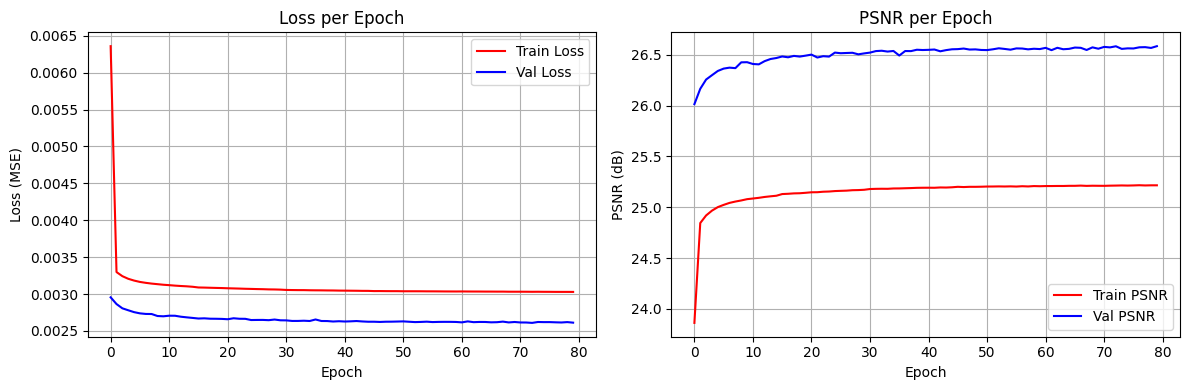

0

In [2]:
train_model_sr(
    model=model,
    model_name="SRCNN",
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    num_epochs=num_epochs,
    scale_factor=4,
    model_requires_upscale=True,
    best_model_path=best_model_path,
    last_model_path=last_model_path,
    history_path=history_path,
    mode="resume",        
    use_amp=False,
    scaler=None
)